In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import chardet
with open('book.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7171222254531355, 'language': ''}

In [3]:
df = pd.read_csv('book.csv',encoding= 'ISO-8859-1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
df.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [5]:
df.shape

(10000, 4)

In [6]:
df.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [7]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [8]:
df.columns = ['UserID','Book_Title','Book_Rating']
df.head()

,UserID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [11]:
df = df.sort_values(by=['UserID'])
df

,UserID,Book_Title,Book_Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [12]:
df.groupby('Book_Title')['Book_Rating'].mean().sort_values(ascending=False).head()

Book_Title
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
Name: Book_Rating, dtype: float64

In [13]:
df.groupby('Book_Title')['Book_Rating'].count().sort_values(ascending=False).head()

Book_Title
Fahrenheit 451                                     5
Vanished                                           4
Charlie and the Chocolate Factory                  4
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Name: Book_Rating, dtype: int64

In [14]:
rating = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].mean())
rating.head()

,Book_Rating
Book_Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [16]:
rating['Num of rating']= pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].count())
rating

,Book_Rating,Num of rating
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


<AxesSubplot:>

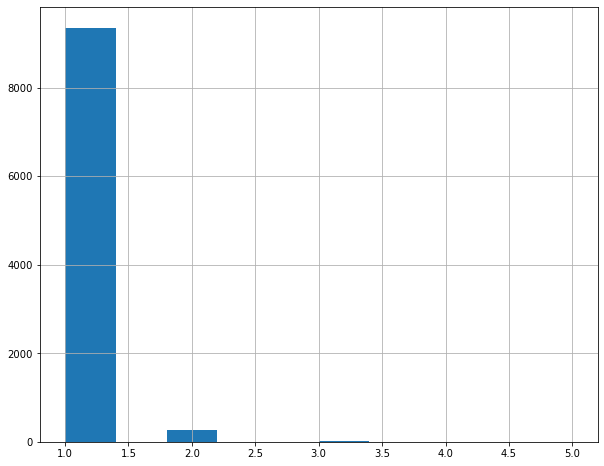

In [18]:
plt.figure(figsize=(10,8))
rating['Num of rating'].hist(bins=10)

<AxesSubplot:>

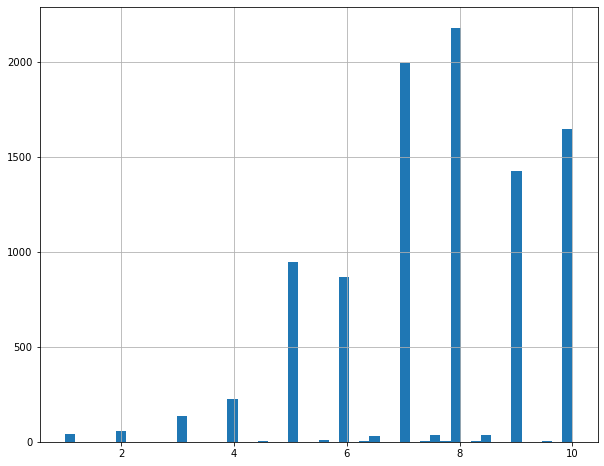

In [25]:
plt.figure(figsize=(10,8))
rating['Book_Rating'].hist(bins=50)

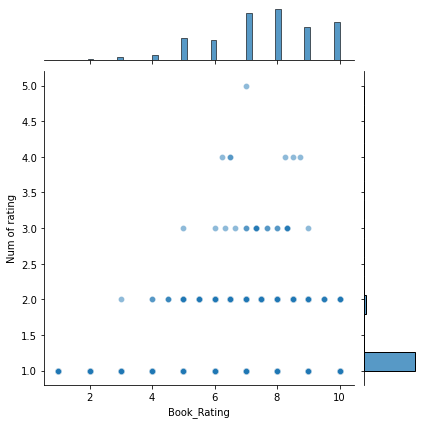

In [26]:
import seaborn as sns

sns.jointplot(x='Book_Rating',y='Num of rating', data=rating,alpha=0.5)

**RECONMMENDING THE BEST BOOK**

In [27]:
book = df.pivot_table(index= 'UserID', columns='Book_Title',values= 'Book_Rating')
book.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rating.sort_values('Num of rating', ascending=False).head()

,Book_Rating,Num of rating
Book_Title,,
Fahrenheit 451,7.00,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.25,4
Stardust,8.50,4
Vanished,6.50,4
Charlie and the Chocolate Factory,6.50,4


In [29]:
fahrenheit_user_rating = book['Fahrenheit 451']
fahrenheit_user_rating.head()

UserID
8    NaN
9    NaN
10   NaN
12   NaN
14   NaN
Name: Fahrenheit 451, dtype: float64

In [30]:
similar_to_fahrenheit = book.corrwith(fahrenheit_user_rating)

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
corr_fahrenheit = pd.DataFrame(similar_to_fahrenheit, columns=['Correlation'])
corr_fahrenheit.dropna(inplace=True)
corr_fahrenheit.head()

,Correlation
Book_Title,
Fahrenheit 451,1.0
